In [4]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
import pandas as pd
df = pd.read_csv("ev_charging_patterns.csv")
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


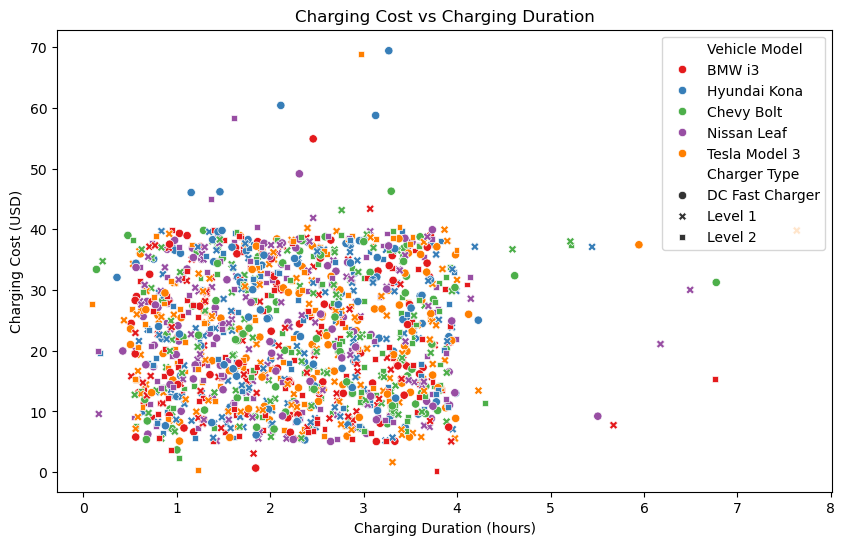

In [14]:
# Charging Cost vs. Charging Duration 

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Charging Duration (hours)', y='Charging Cost (USD)', hue='Vehicle Model', style='Charger Type', palette='Set1')
plt.title('Charging Cost vs Charging Duration')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Charging Cost (USD)')
plt.show()

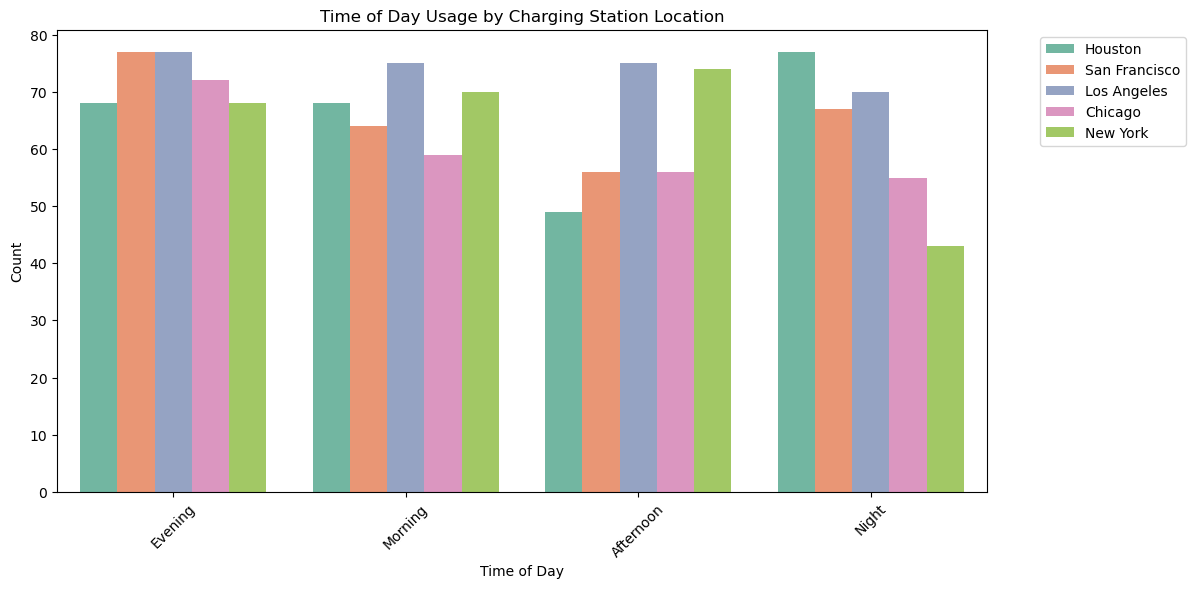

In [16]:
# Time of Day Usage by Charging Station Location

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Time of Day', hue='Charging Station Location', palette='Set2')
plt.title('Time of Day Usage by Charging Station Location')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

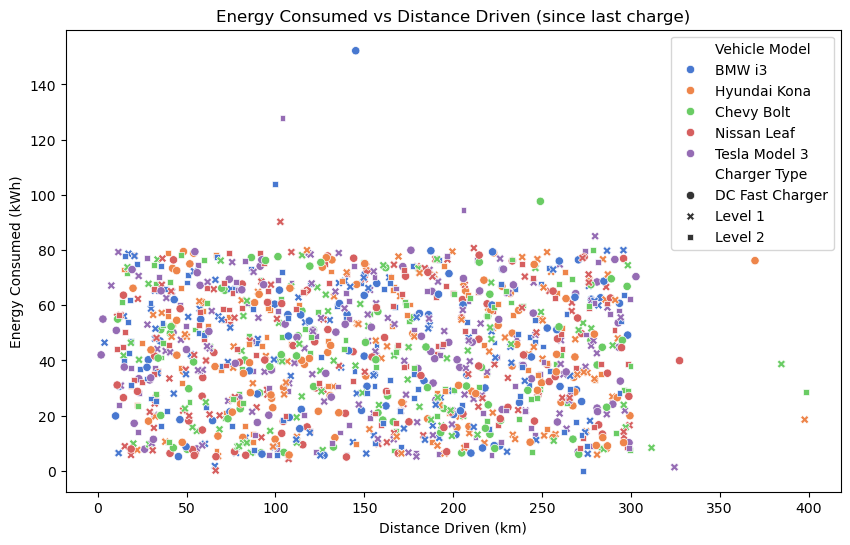

In [20]:
# Energy Consumed vs. Distance Driven (since last charge)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance Driven (since last charge) (km)', y='Energy Consumed (kWh)', hue='Vehicle Model', style='Charger Type', palette='muted')
plt.title('Energy Consumed vs Distance Driven (since last charge)')
plt.xlabel('Distance Driven (km)')
plt.ylabel('Energy Consumed (kWh)')
plt.show()

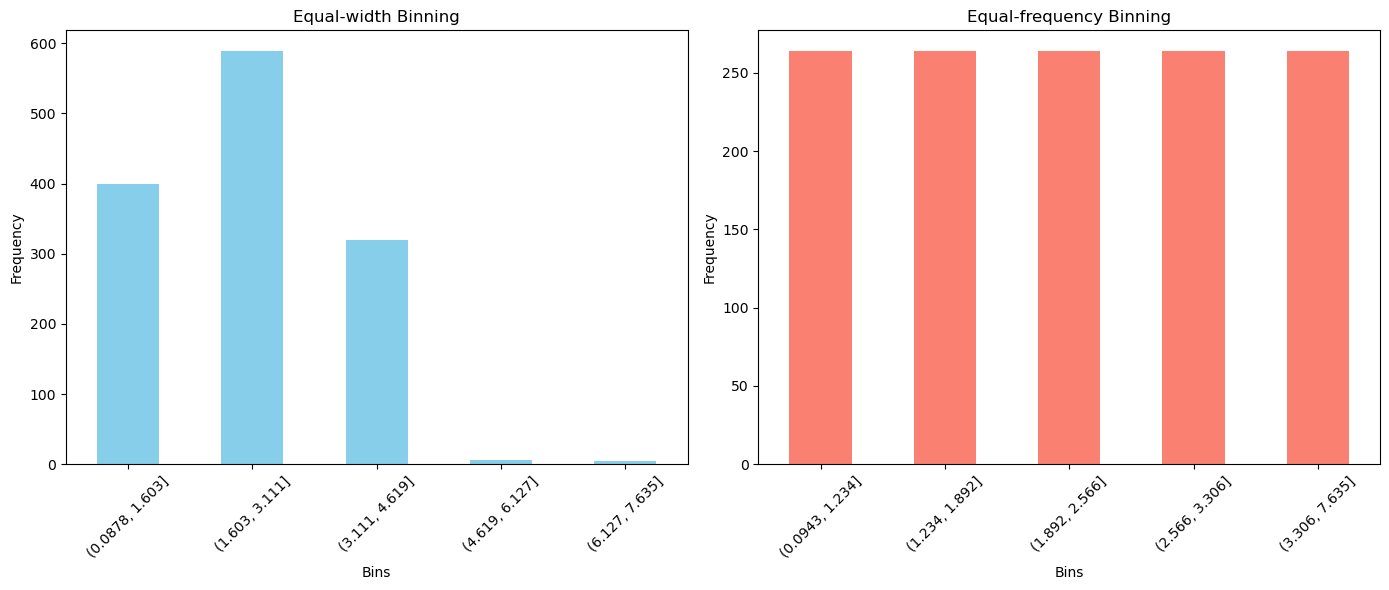

Shape of the original DataFrame: (1320, 20)


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the column for discretization
column_to_discretize = 'Charging Duration (hours)'

# Check if the column exists in the dataset
if column_to_discretize in df.columns:
    # Create a copy of the DataFrame to perform discretization
    df_copy = df.copy()

    # Equal-width binning: Define 5 bins
    df_copy['equal_width_bins'] = pd.cut(df_copy[column_to_discretize], bins=5)
    
    # Equal-frequency binning: Define 5 quantiles
    df_copy['equal_freq_bins'] = pd.qcut(df_copy[column_to_discretize], q=5)

    # Plotting the histograms for equal-width and equal-frequency bins
    plt.figure(figsize=(14, 6))

    # Equal-width binning plot
    plt.subplot(1, 2, 1)
    df_copy['equal_width_bins'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title('Equal-width Binning')
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

    # Equal-frequency binning plot
    plt.subplot(1, 2, 2)
    df_copy['equal_freq_bins'].value_counts().sort_index().plot(kind='bar', color='salmon')
    plt.title('Equal-frequency Binning')
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Display the shape of the original DataFrame for reference
    print("Shape of the original DataFrame:", df.shape)

else:
    print(f"Column '{column_to_discretize}' not found in the dataset.")


C:\Users\saisr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Number of users in Cluster 0: 363
Number of users in Cluster 1: 585
Number of users in Cluster 2: 306
Cluster 0 (First 5 rows):
     User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0    User_1        BMW i3              108.463007         Station_391   
3    User_4  Hyundai Kona               50.000000         Station_327   
7    User_8    Chevy Bolt               75.000000         Station_302   
9   User_10  Hyundai Kona               50.000000         Station_452   
19  User_20        BMW i3               50.000000         Station_125   

   Charging Station Location  Charging Start Time    Charging End Time  \
0                    Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
3                    Houston  2024-01-01 03:00:00  2024-01-01 06:42:00   
7                Los Angeles  2024-01-01 07:00:00  2024-01-01 10:42:00   
9                    Chicago  2024-01-01 09:00:00  2024-01-01 12:44:00   
19               Los Angeles  2024-01-01 19:00:00  2024-01-01 

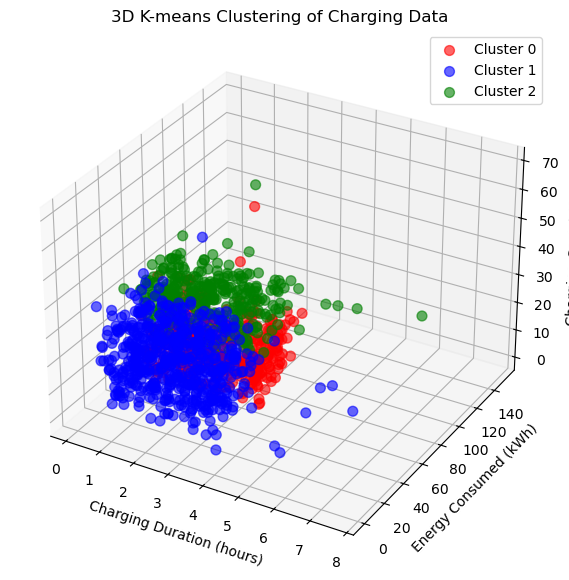

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select the columns for clustering
columns_for_clustering = ['Charging Duration (hours)', 'Energy Consumed (kWh)', 'Charging Cost (USD)']

# Check if all specified columns exist in the dataset
if all(column in df.columns for column in columns_for_clustering):
    # Extract the data for clustering and drop rows with missing values
    data_for_clustering = df[columns_for_clustering].dropna()

    # Apply K-means clustering with 3 clusters
    kmeans = KMeans(n_clusters=3, random_state=42)
    data_for_clustering['Cluster'] = kmeans.fit_predict(data_for_clustering)

    # Create a new DataFrame with the original data and the 'Cluster' column
    df_with_clusters = df.copy()
    df_with_clusters = df_with_clusters.join(data_for_clustering['Cluster'], how='left')

    # Split the new DataFrame into three clusters and display the head and count for each
    cluster_0 = df_with_clusters[df_with_clusters['Cluster'] == 0]
    cluster_1 = df_with_clusters[df_with_clusters['Cluster'] == 1]
    cluster_2 = df_with_clusters[df_with_clusters['Cluster'] == 2]

    # Display the head of each cluster's DataFrame and the number of users in each
    print("Number of users in Cluster 0:", len(cluster_0))
    print("Number of users in Cluster 1:", len(cluster_1))
    print("Number of users in Cluster 2:", len(cluster_2))

    print("Cluster 0 (First 5 rows):\n", cluster_0.head())
    print("\nCluster 1 (First 5 rows):\n", cluster_1.head())
    print("\nCluster 2 (First 5 rows):\n", cluster_2.head())

    # 3D Plot of the clusters
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Define the colors for each cluster
    colors = ['red', 'blue', 'green']

    # Scatter plot for each cluster
    for cluster_num, color in enumerate(colors):
        cluster_data = data_for_clustering[data_for_clustering['Cluster'] == cluster_num]
        ax.scatter(cluster_data[columns_for_clustering[0]],
                   cluster_data[columns_for_clustering[1]],
                   cluster_data[columns_for_clustering[2]],
                   c=color, label=f'Cluster {cluster_num}', s=50, alpha=0.6)

    # Label the axes
    ax.set_xlabel(columns_for_clustering[0])
    ax.set_ylabel(columns_for_clustering[1])
    ax.set_zlabel(columns_for_clustering[2])

    # Add a legend and title
    ax.legend()
    ax.set_title("3D K-means Clustering of Charging Data")

    # Show the plot
    plt.show()

else:
    print("One or more specified columns for clustering are missing in the dataset.")


Accuracy of the KNN model: 0.33156498673740054


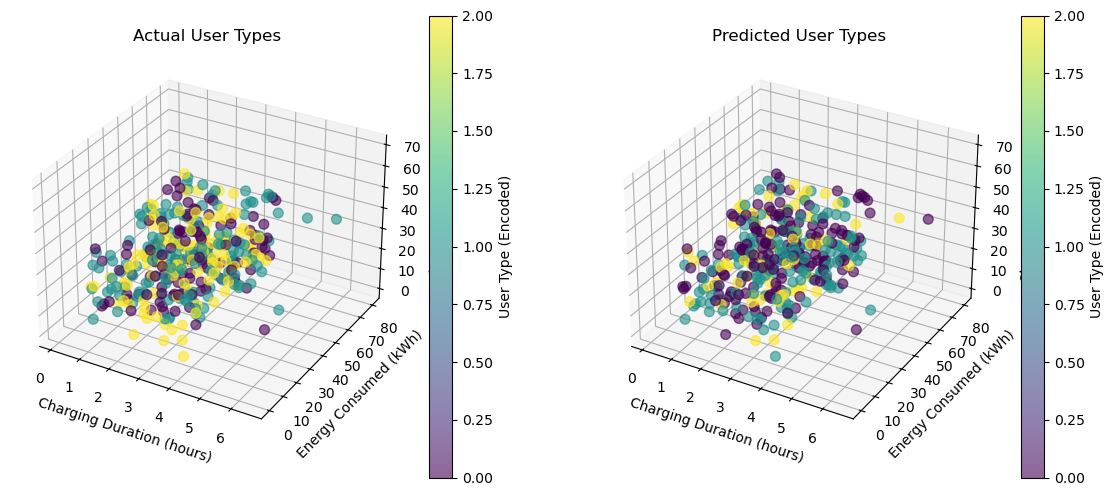

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define features and target column (replace 'User Type' with the actual target column if different)
features = ['Charging Duration (hours)', 'Energy Consumed (kWh)', 'Charging Cost (USD)']
target = 'User Type'  # Hypothetical target column for classification

# Check if all specified columns exist in the dataset
if all(column in df.columns for column in features + [target]):
    # Create a copy of the DataFrame with only the selected columns and drop rows with missing values
    df_copy = df[features + [target]].dropna()

    # Split the data into features (X) and target (y)
    X = df_copy[features]
    y = df_copy[target]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the KNN classifier with k=5 (you can adjust k based on preference)
    knn = KNeighborsClassifier(n_neighbors=5)

    # Train the KNN model
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of the KNN model:", accuracy)

    # Encode target labels as numeric values
    label_encoder = LabelEncoder()
    y_test_encoded = label_encoder.fit_transform(y_test)
    y_pred_encoded = label_encoder.transform(y_pred)

    # Create a 3D scatter plot for actual and predicted labels
    fig = plt.figure(figsize=(14, 6))

    # Plot actual classes in the left subplot
    ax1 = fig.add_subplot(121, projection='3d')
    scatter1 = ax1.scatter(X_test[features[0]], X_test[features[1]], X_test[features[2]], 
                           c=y_test_encoded, cmap='viridis', s=50, alpha=0.6)
    ax1.set_title("Actual User Types")
    ax1.set_xlabel(features[0])
    ax1.set_ylabel(features[1])
    ax1.set_zlabel(features[2])
    fig.colorbar(scatter1, ax=ax1, label='User Type (Encoded)')

    # Plot predicted classes in the right subplot
    ax2 = fig.add_subplot(122, projection='3d')
    scatter2 = ax2.scatter(X_test[features[0]], X_test[features[1]], X_test[features[2]], 
                           c=y_pred_encoded, cmap='viridis', s=50, alpha=0.6)
    ax2.set_title("Predicted User Types")
    ax2.set_xlabel(features[0])
    ax2.set_ylabel(features[1])
    ax2.set_zlabel(features[2])
    fig.colorbar(scatter2, ax=ax2, label='User Type (Encoded)')

    plt.show()

else:
    print("One or more specified columns are missing in the dataset.")


In [30]:
# Check for duplicates
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows before removal: {duplicates_count}")

# Remove duplicates
df = df.drop_duplicates()

# Verify removal
duplicates_count_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_count_after}")

# Save the cleaned data if needed
#df.to_csv('/mnt/data/ev_charging_patterns_cleaned.csv', index=False)
print("Duplicates removed and cleaned data saved.")


Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0
Duplicates removed and cleaned data saved.


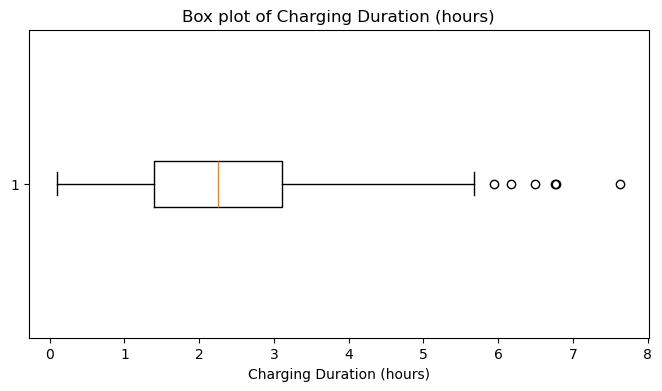

lower bound is  -1.175150947515451
upper bound is  5.685580736675909
Original data shape: (1320, 20)
Data shape after outlier removal for Charging Duration (hours): (1314, 20)


In [32]:
# Column to analyze for outliers
column_to_check = 'Charging Duration (hours)'

# Visualize outliers with a box plot for the selected column
plt.figure(figsize=(8, 4))
plt.boxplot(df[column_to_check].dropna(), vert=False)
plt.title(f'Box plot of {column_to_check}')
plt.xlabel(column_to_check)
plt.show()

# Remove outliers using the IQR method for the selected column
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column_to_check].quantile(0.25)
Q3 = df[column_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('lower bound is ',lower_bound)
print('upper bound is ',upper_bound)


# Filter out the outliers
df_no_outliers = df[(df[column_to_check] >= lower_bound) & (df[column_to_check] <= upper_bound)]

# Display the shape of the data before and after removing outliers
print(f"Original data shape: {df.shape}")
print(f"Data shape after outlier removal for {column_to_check}: {df_no_outliers.shape}")

# Save the cleaned data if needed
#df_no_outliers.to_csv('/mnt/data/ev_charging_patterns_no_outliers_duration.csv', index=False)
#print("Outliers removed and cleaned data saved.")


Original Data and Predicted Values using 4-Row Average (first 10 rows):
   Charging Duration (hours)  predicted_duration_moving_avg
0                   0.591363                            NaN
1                   3.133652                            NaN
2                   2.452653                            NaN
3                   1.266431                            NaN
4                   2.019765                       1.861025
5                   1.167640                       2.218125
6                   3.539619                       1.726622
7                   2.655396                       1.998364
8                   1.724204                       2.345605
9                   2.026875                       2.271715


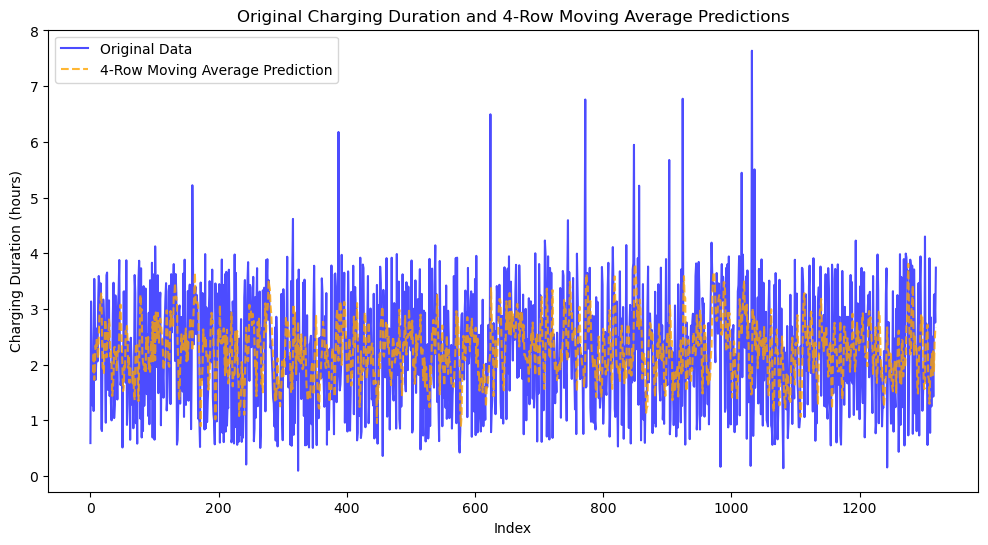

In [38]:
import matplotlib.pyplot as plt

# Specify the column for smoothing
column_to_smooth = 'Charging Duration (hours)'

# Check if the column exists in the dataset
if column_to_smooth in df.columns:
    # Create a copy of the DataFrame to perform smoothing
    df_copy = df.copy()

    # Apply a rolling mean (moving average) with a window size of 4, excluding the current row
    # The 'shift(1)' moves the calculated rolling average one row down
    df_copy['predicted_duration_moving_avg'] = df_copy[column_to_smooth].shift(1).rolling(window=4).mean()

    # Display a sample of the original and smoothed data
    print("Original Data and Predicted Values using 4-Row Average (first 10 rows):")
    print(df_copy[[column_to_smooth, 'predicted_duration_moving_avg']].head(10))

    # Plotting the original and smoothed data
    plt.figure(figsize=(12, 6))

    # Plot original data
    plt.plot(df_copy.index, df_copy[column_to_smooth], label='Original Data', color='blue', alpha=0.7)

    # Plot 4-row moving average prediction data
    plt.plot(df_copy.index, df_copy['predicted_duration_moving_avg'], label='4-Row Moving Average Prediction', color='orange', linestyle='--', alpha=0.8)

    # Adding title and labels
    plt.title("Original Charging Duration and 4-Row Moving Average Predictions")
    plt.xlabel("Index")
    plt.ylabel("Charging Duration (hours)")
    plt.legend()
    plt.show()

else:
    print(f"Column '{column_to_smooth}' not found in the dataset.")


Original vs. Normalized Data (first 5 rows):
  User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0  User_1        BMW i3                0.558469         Station_391   
1  User_2  Hyundai Kona                0.514269         Station_428   
2  User_3    Chevy Bolt                0.383700         Station_181   
3  User_4  Hyundai Kona                0.253132         Station_327   
4  User_5  Hyundai Kona                0.253132         Station_108   

  Charging Station Location  Charging Start Time    Charging End Time  \
0                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1             San Francisco  2024-01-01 01:00:00  2024-01-01 03:01:00   
2             San Francisco  2024-01-01 02:00:00  2024-01-01 04:48:00   
3                   Houston  2024-01-01 03:00:00  2024-01-01 06:42:00   
4               Los Angeles  2024-01-01 04:00:00  2024-01-01 05:46:00   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0             

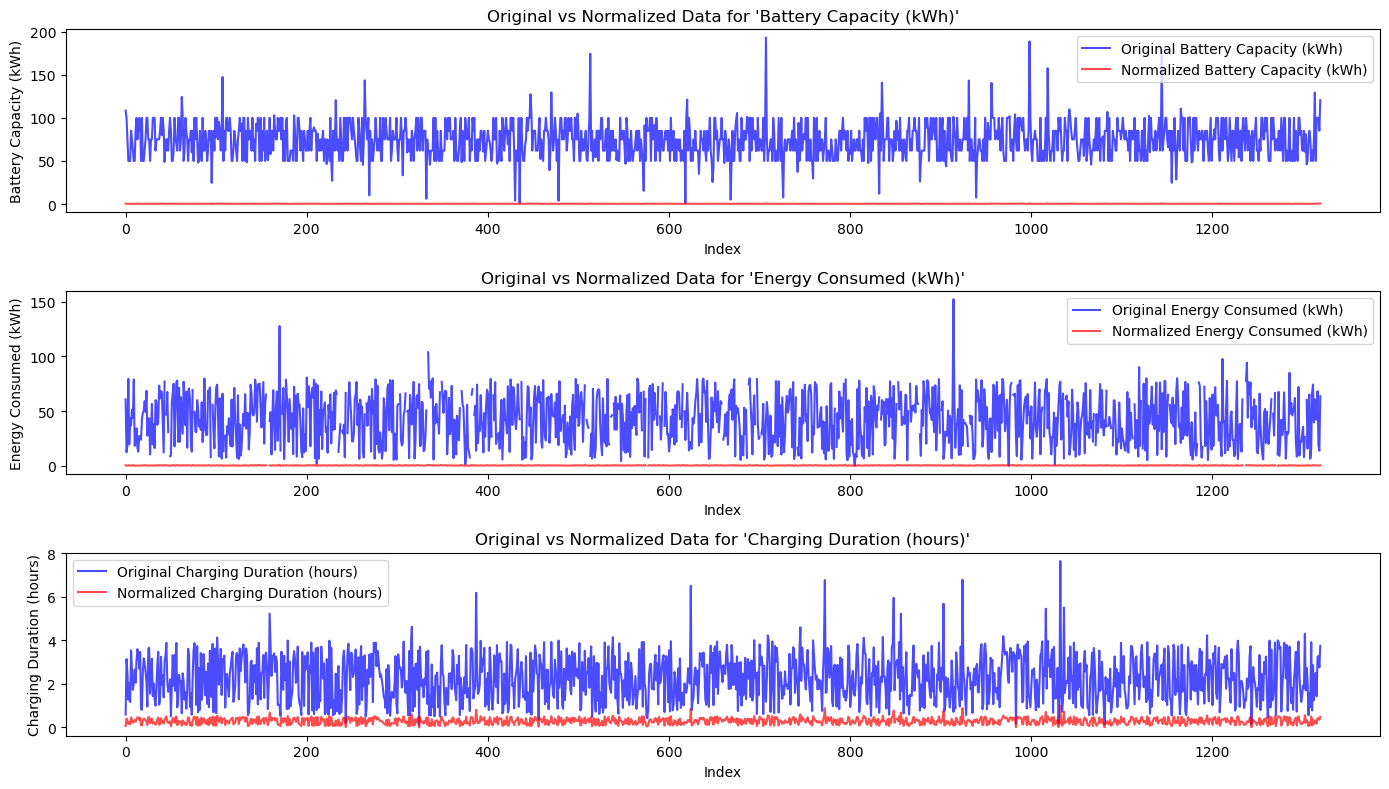

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Selecting only the numeric columns for normalization
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()

# Applying Min-Max normalization
df_normalized = df.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows of the normalized data
print("Original vs. Normalized Data (first 5 rows):")
print(df_normalized.head())

# Plotting original vs normalized data for the first numeric column
plt.figure(figsize=(14, 8))

for idx, column in enumerate(numeric_columns[:3], start=1):  # Limiting to 3 columns for clarity
    plt.subplot(3, 1, idx)
    plt.plot(df.index, df[column], label=f'Original {column}', color='blue', alpha=0.7)
    plt.plot(df_normalized.index, df_normalized[column], label=f'Normalized {column}', color='red', alpha=0.7)
    plt.title(f"Original vs Normalized Data for '{column}'")
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()


  User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0  User_1        BMW i3                1.645480         Station_391   
1  User_2  Hyundai Kona                1.235035         Station_428   
2  User_3    Chevy Bolt                0.022567         Station_181   
3  User_4  Hyundai Kona               -1.189901         Station_327   
4  User_5  Hyundai Kona               -1.189901         Station_108   

  Charging Station Location  Charging Start Time    Charging End Time  \
0                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1             San Francisco  2024-01-01 01:00:00  2024-01-01 03:01:00   
2             San Francisco  2024-01-01 02:00:00  2024-01-01 04:48:00   
3                   Houston  2024-01-01 03:00:00  2024-01-01 06:42:00   
4               Los Angeles  2024-01-01 04:00:00  2024-01-01 05:46:00   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0               0.806572                  -1.582085        

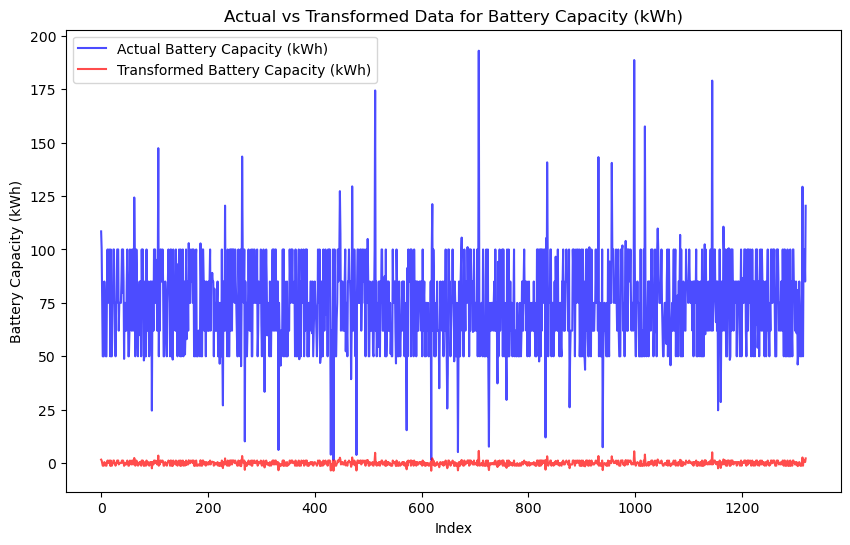

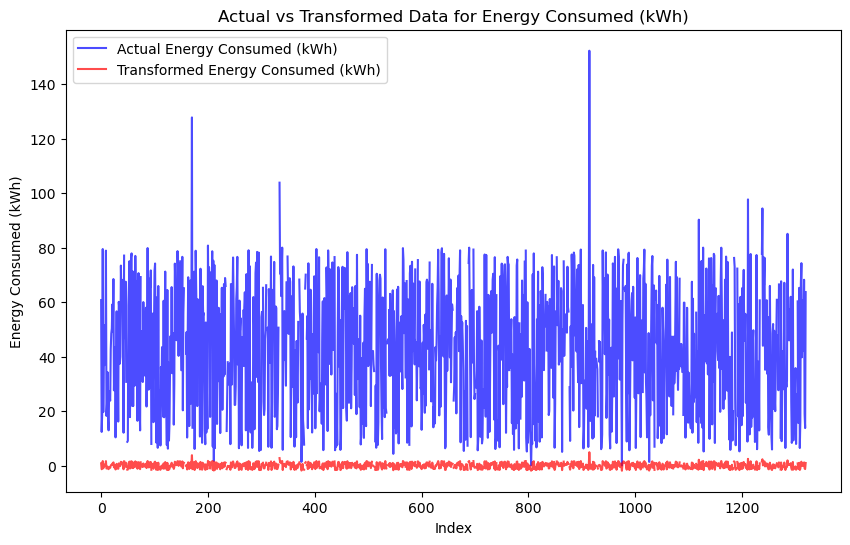

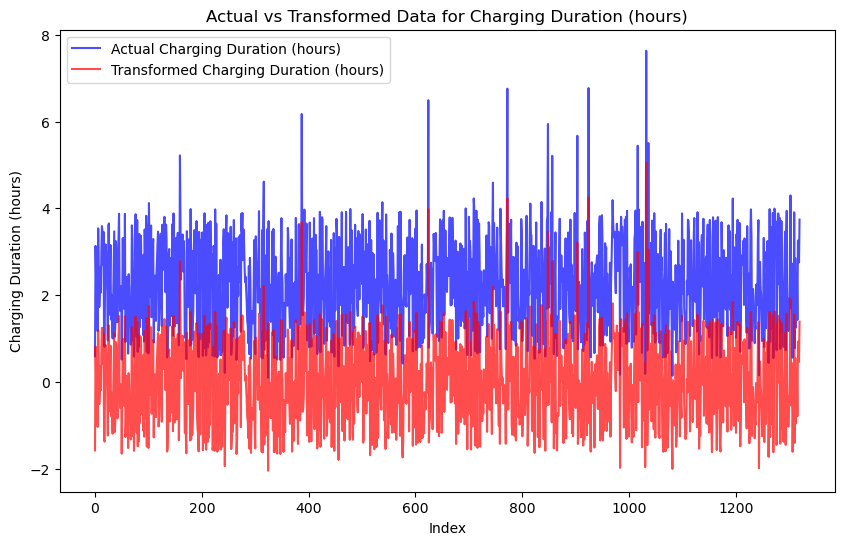

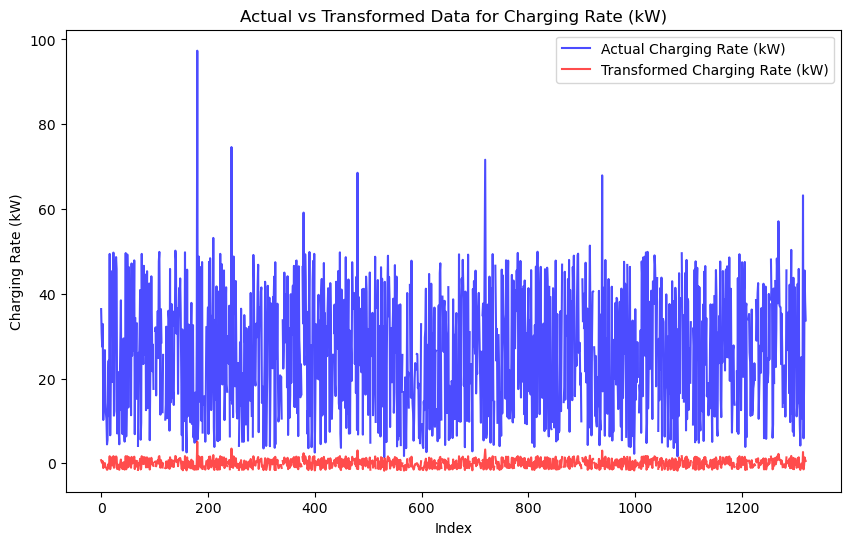

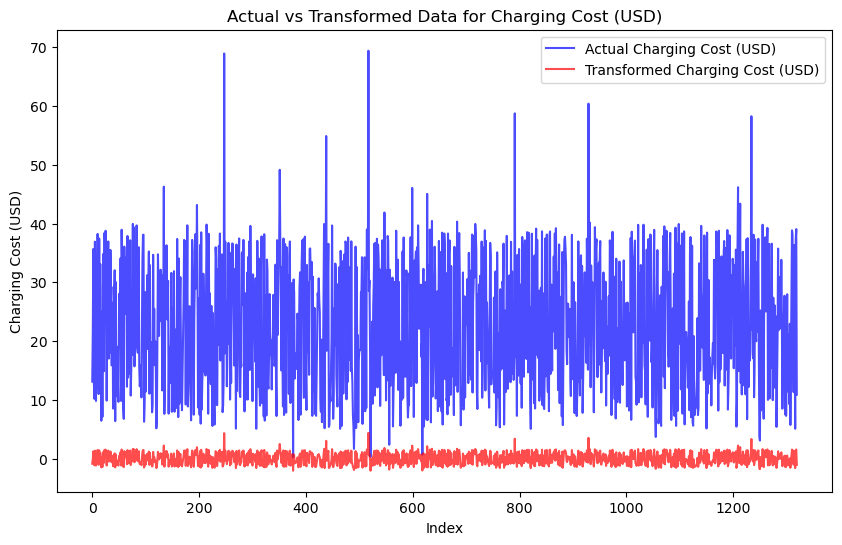

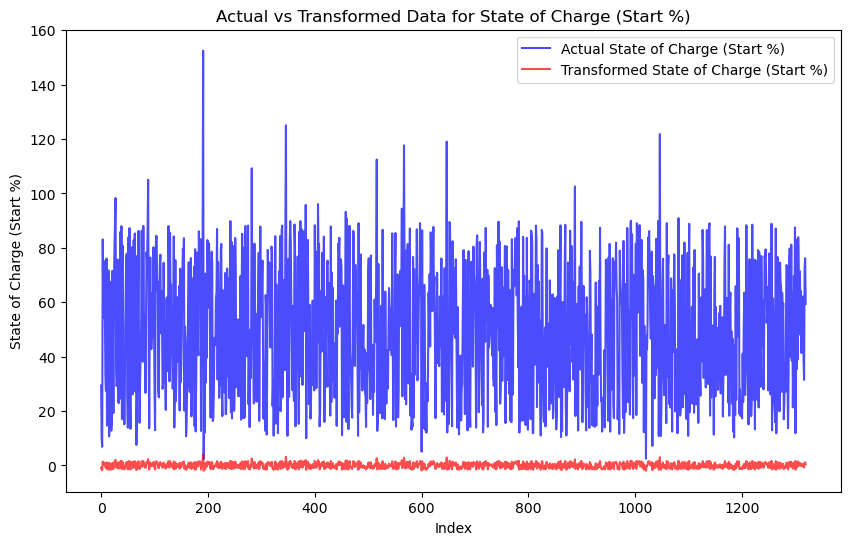

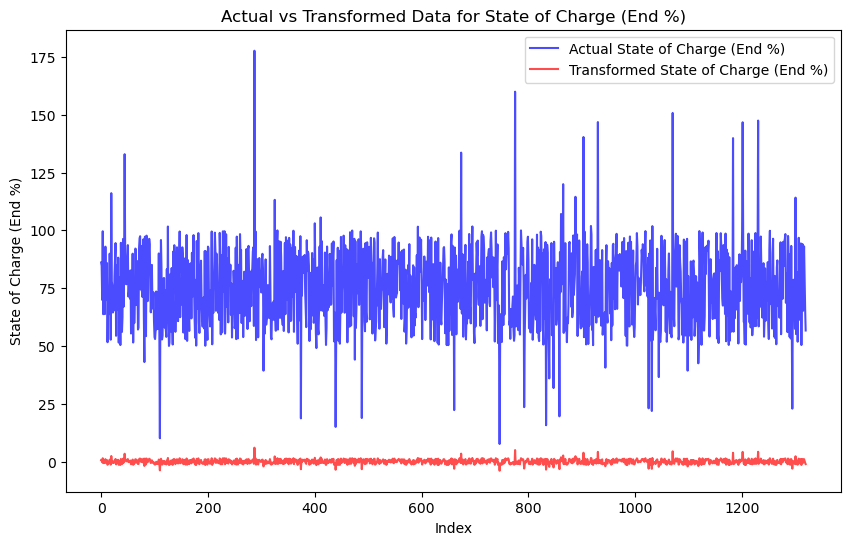

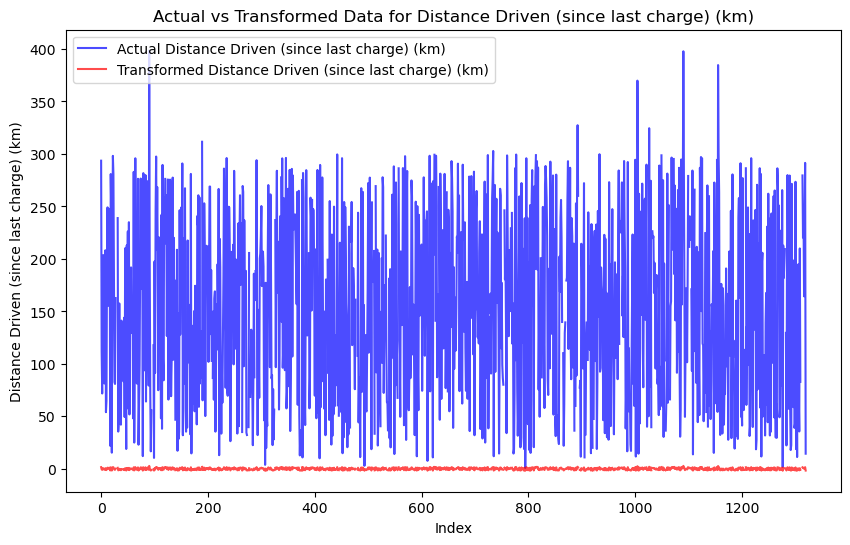

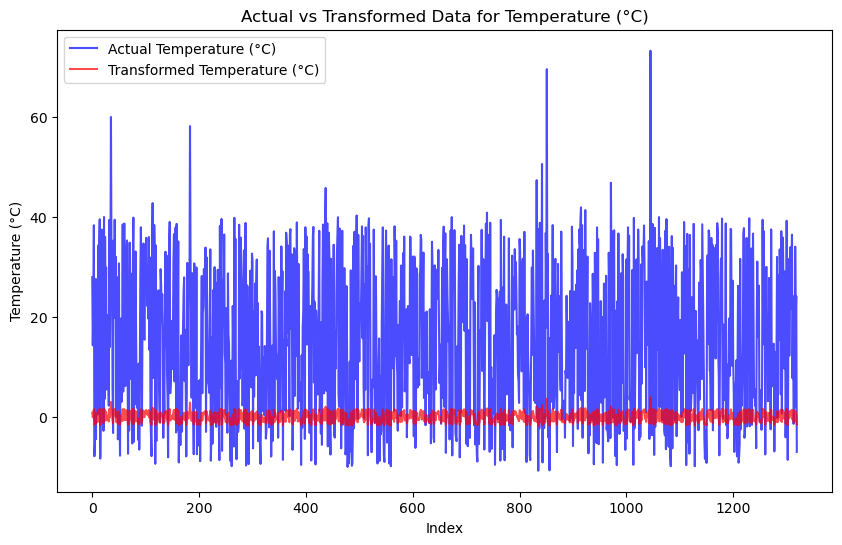

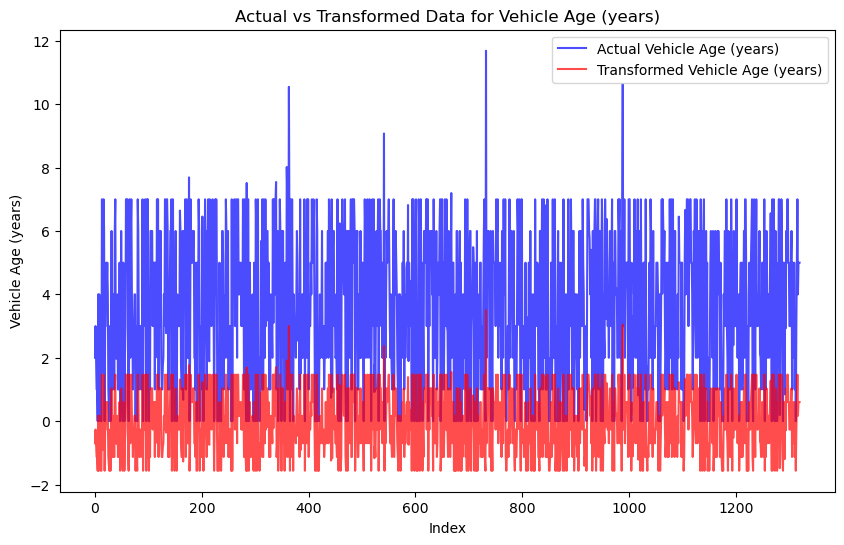

In [72]:
from sklearn.preprocessing import StandardScaler

# Selecting only the numeric columns for normalization
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

# Applying Z-Score normalization
df_z_score_normalized = df.copy()
df_z_score_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows of the normalized data
print(df_z_score_normalized.head())

# Save the normalized data to a new CSV file (optional)
#df_z_score_normalized.to_csv('/path/to/your/z_score_normalized_ev_charging_patterns.csv', index=False)
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df[column], label=f'Actual {column}', color='blue', alpha=0.7)
    plt.plot(df_z_score_normalized[column], label=f'Transformed {column}', color='red', alpha=0.7)
    plt.title(f'Actual vs Transformed Data for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

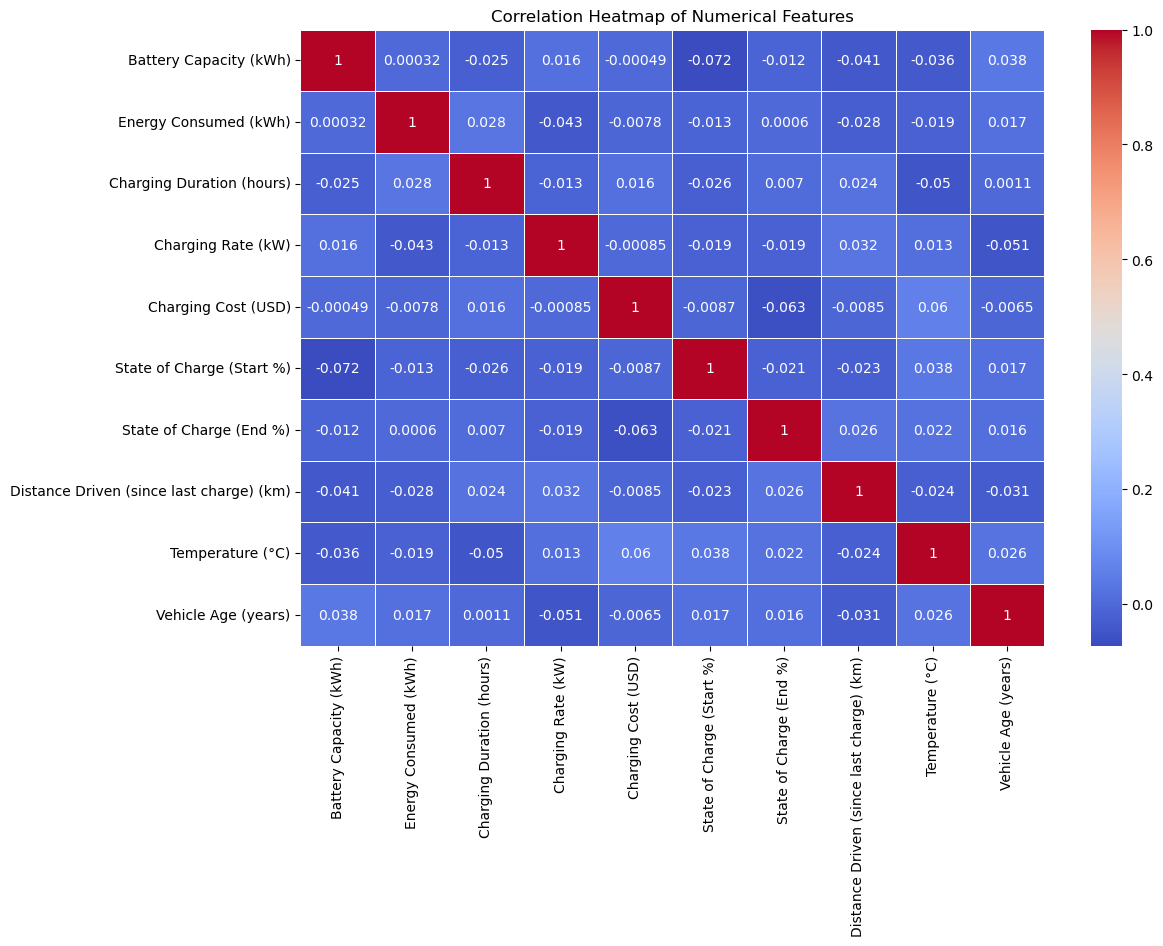

(1320, 20)

In [46]:
# Summary Statistics

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
df.shape


In [64]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


# Select relevant numerical columns for PCA
numeric_columns = [
    'Charging Duration (hours)', 
    'Energy Consumed (kWh)', 
    'Charging Rate (kW)', 
    'Charging Cost (USD)', 
    'State of Charge (Start %)', 
    'State of Charge (End %)', 
    'Distance Driven (since last charge) (km)', 
    'Temperature (°C)', 
    'Vehicle Age (years)'
]

# Filter the DataFrame to only include selected numerical columns and drop missing values
df_numeric = df[numeric_columns].dropna()

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA with a variance threshold of 95%
pca = PCA(n_components=0.8)
pca_result = pca.fit_transform(df_scaled)

# Get the loadings (contribution of each feature to each component)
loadings = pca.components_

# Identify the original columns most contributing to each principal component
# We take the column with the maximum absolute loading for each component
component_names = []
for i, component in enumerate(loadings):
    # Get index of the highest contributing original feature for this component
    max_contrib_index = np.argmax(np.abs(component))
    # Assign the column name with the highest contribution to this component
    component_names.append(numeric_columns[max_contrib_index])

# If some component names are repeated, we can keep default names for non-unique cases.
# Convert PCA results to DataFrame with assigned names
df_pca_reduced = pd.DataFrame(pca_result, columns=component_names)

# Display original and reduced column counts
original_column_count = df_numeric.shape[1]
reduced_column_count = df_pca_reduced.shape[1]

print(f"Original number of columns: {original_column_count}")
print(f"Reduced number of columns after PCA: {reduced_column_count}")
print(f"Explained variance by each component: {pca.explained_variance_ratio_}")
print(f"Total explained variance with reduced components: {pca.explained_variance_ratio_.sum()}")

# Display final column names assigned after PCA
print("Column names after PCA reduction:", df_pca_reduced.columns.tolist())

# Save the reduced data to a new CSV file if needed
print(df_pca_reduced.head())


Original number of columns: 9
Reduced number of columns after PCA: 7
Explained variance by each component: [0.12453831 0.12189776 0.11910291 0.1158094  0.11146249 0.10733872
 0.10410909]
Total explained variance with reduced components: 0.8042586959580931
Column names after PCA reduction: ['Energy Consumed (kWh)', 'Distance Driven (since last charge) (km)', 'State of Charge (End %)', 'Temperature (°C)', 'Energy Consumed (kWh)', 'Vehicle Age (years)', 'Charging Rate (kW)']
   Energy Consumed (kWh)  Distance Driven (since last charge) (km)  \
0               0.618578                                  0.782414   
1               0.363902                                  1.119898   
2               1.420825                                  0.348707   
3              -0.024895                                 -0.652995   
4              -0.210938                                  0.495313   

   State of Charge (End %)  Temperature (°C)  Energy Consumed (kWh)  \
0                 1.849951     